In [1]:
import numpy as np
import cv2
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [2]:
def clipped_zoom(img, zoom_factor, **kwargs):
    
    image = mping.imread(img)
    
    width = image.shape[0]
    height = image.shape[1]
    
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (image.ndim - 2)
    
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(height * zoom_factor))
        zw = int(np.round(width * zoom_factor))
        top = (height - zh) // 2
        left = (width - zw) // 2

        # Zero-padding
        out = np.zeros_like(image)
        out[top:top+zh, left:left+zw] = zoom(image, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(height / zoom_factor))
        zw = int(np.round(width / zoom_factor))
        top = (height - zh) // 2
        left = (width - zw) // 2

        out = zoom(image[top:top+zh, left:left+zw], zoom_tuple, **kwargs)


        trim_top = ((out.shape[0] - height) // 2)
        trim_left = ((out.shape[1] - width) // 2)
        out = out[trim_top:trim_top+height, trim_left:trim_left+width]
        #zoom_image = mping.imsave()
    # If zoom_factor == 1, just return the input array
    else:
        out = image
        
    return out



In [3]:
img = '/Users/waranthornchansawang/Desktop/xxx/arm/AD/AD_arm_37.jpg'

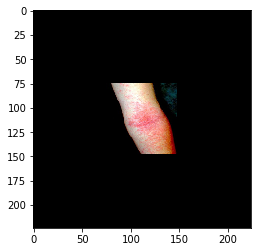

In [6]:
zm1 = clipped_zoom(img, 0.33)
zm2 = clipped_zoom(img, 1.5)
#print(zm1)
mping.imsave('/Users/waranthornchansawang/Desktop/xxx/vvv/x.jpg', zm1)
#ax[0].imshow(img)
plt.imshow(zm1)

#ax[2].imshow(zm2)